# Choosing study site

We will use the 'random' module to generate a study site based on Queensland's Great Barrier Reef for randomly selecting study sites. The longitude limit lies between 142.531508 and 154.000999, and the latitude limit lies between -24.498499 and -10.681889. We ran the code multiple times until we were satisfied with the distribution of the results in order to demonstrate the impact of extreme weather on seagrass in various locations. To ensure that the study area contains data, however, the value following the decimal point was identified by a human at .

In [1]:
import random

In [2]:
#select latitude point
for i in range(1,5):#choosing 4 values
    a = random.randint(-25,-9) #the range
    print(a)

-24
-19
-16
-23


In [3]:
#select longtitude point 
for i in range(1,5):#choosing 4 values
    b = random.randint(141,155)#the range
    print(b)

149
142
150
148


Based on the result we get, we finally chose four study sites.
Site 1: latitude:[-13.0,-13.2];longtitude:[143.5,143.7];
Site 2: latitude:[-16.0,-16.2];longtitude:[145.5,145.7];
Site 3: latitude:[-19.0,-19.2];longtitude:[147.0,147.2];
Site 4: latitude:[-22.0,-22.2];longtitude:[149.6,149.8].


# Plot study site location

In [4]:
#import tool for plot map
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

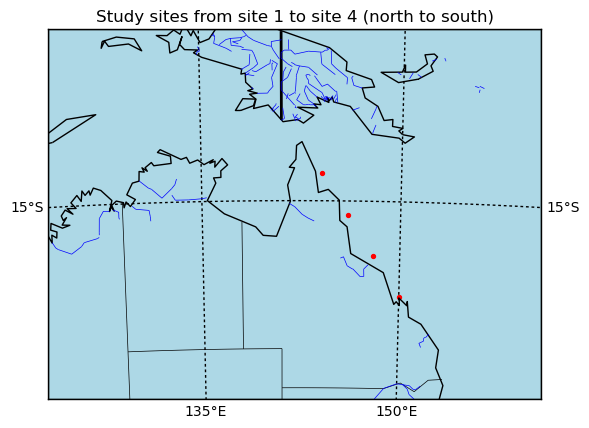

In [5]:
#create basemap plot 
m=Basemap(width=4000000,height=3000000,resolution='c',projection='aea',lat_1=-12.,lat_2=-8.,lon_0=142.,lat_0=-16)
m.drawcoastlines()
m.drawparallels(np.arange(-90.,91.,15.),labels=[True,True,False,False],dashes=[2,2])
m.drawmeridians(np.arange(-180.,181.,15.),labels=[False,False,False,True],dashes=[2,2])
m.drawmapboundary(fill_color='lightblue') #adding boundary
m.drawcountries(linewidth=2, linestyle='solid', color='k' ) #features in the plot
m.drawstates(linewidth=0.5, linestyle='solid', color='k')
m.drawrivers(linewidth=0.5, linestyle='solid', color='blue')

latitude = [-13, -16, -19, -22] #site latitude
longtitude = [144, 146, 148, 150]#site longtitude
m.scatter(longtitude,latitude,latlon=True,c='red',s=8)

plt.title('Study sites from site 1 to site 4 (north to south)')
plt.show()

# Data Extractiong

In [6]:
import xarray as xr
import pandas as pd

Load the nc file

In [7]:
url = 'https://dapds00.nci.org.au/thredds/dodsC/fx3/model_data/gbr4_bgc_GBR4_H2p0_B2p0_Chyd_Dnrt.ncml'
newds = xr.open_dataset(url) 

Then we take the variables we want:

In [8]:
variables = [
    'temp',
    'SGD_N_gr',
    'salt',
    'EpiPAR_sg',
]
data = newds[variables].isel(k=-1).drop('zc')
data

<xarray.Dataset>
Dimensions:    (time: 1178, j: 180, i: 600)
Coordinates:
    longitude  (j, i) float64 ...
    latitude   (j, i) float64 ...
  * time       (time) datetime64[ns] 2016-11-01T02:00:00 ... 2019-11-28T02:00:00
Dimensions without coordinates: j, i
Data variables:
    temp       (time, j, i) float32 ...
    SGD_N_gr   (time, j, i) float32 ...
    salt       (time, j, i) float32 ...
    EpiPAR_sg  (time, j, i) float32 ...
Attributes:
    Run_ID:       2.0
    hasVocab:     1
    title:        GBR4 BGC (Spectral) Transport
    paramhead:    GBR 4km resolution grid
    paramfile:    in.prm
    ems_version:  v1.0 rev(5997)
    Conventions:  CF-1.0

We will use the function below to get the coordinates corresponding to the different region of interest:

In [9]:
def findValues(data, lonpos, latpos):#using def function to define sites' location based on latitute and longtitude

    lats = data.latitude.values 
    lons = data.longitude.values

    indexlat = np.where(np.logical_and(lats>latpos[0],lats<latpos[1])) #set boundary
    indexlon = np.where(np.logical_and(lons>lonpos[0],lons<lonpos[1]))

    listlat = np.stack((indexlat[0],indexlat[1])).T.tolist() #export as a new array
    listlon = np.stack((indexlon[0],indexlon[1])).T.tolist()
    ij = np.asarray([element for element in listlat if element in listlon])
    
    return ij

Then we export the indices `(i,j)` from each region:

In [10]:
LG1=[143.5,143.7]
LT1=[-13.2,-13.0]
ij1 = findValues(data,LG1,LT1)

LG2=[145.5,145.7]
LT2=[-16.2,-16.0]
ij2 = findValues(data,LG2,LT2)

LG3=[147.0,147.2]
LT3=[-19.2,-19.0]
ij3 = findValues(data,LG3,LT3)

LG4=[149.6,149.8]
LT4=[-22.2,-22.0]
ij4 = findValues(data,LG4,LT4)

We now extract the data for each region and save it as a netcdf file:

In [11]:
val1 = data.isel(j=ij1[:,0],i=ij1[:,1])
val1.to_netcdf('data1.nc')

In [12]:
val2 = data.isel(j=ij2[:,0],i=ij2[:,1])
val2.to_netcdf('data2.nc')

In [13]:
val3 = data.isel(j=ij3[:,0],i=ij3[:,1])
val3.to_netcdf('data3.nc')

In [14]:
val4 = data.isel(j=ij4[:,0],i=ij4[:,1])
val4.to_netcdf('data4.nc')